In [15]:
import numpy as np
import matplotlib.pyplot as plt
import random

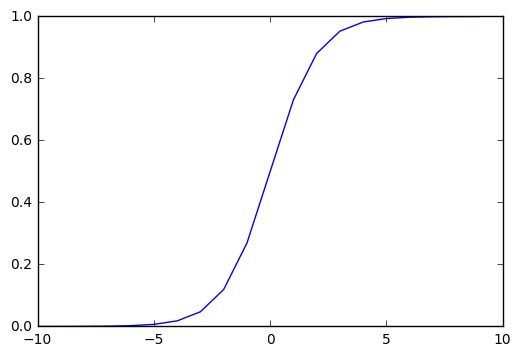

In [13]:
fig = plt.figure()

X = np.arange(-10,10)
Y = np.array([1.0/(1+np.exp(-x)) for x in X])

plt.plot(X,Y)
plt.show()

In [16]:
random.uniform(0.5,1)

0.9776946317855351

In [145]:
y_train1 = [0 if i%2 == 0 else 1 for i in range(100)]
y_train_dash = [1.0/(1+np.exp(10-0.2*i)) for i in x_train]
#x_train = [5+3*i+10*np.random.normal() if i%2 == 0 else 100+3.5*i+10*np.random.normal() for i in range(100)]
x_train = [i for i in range(100)]

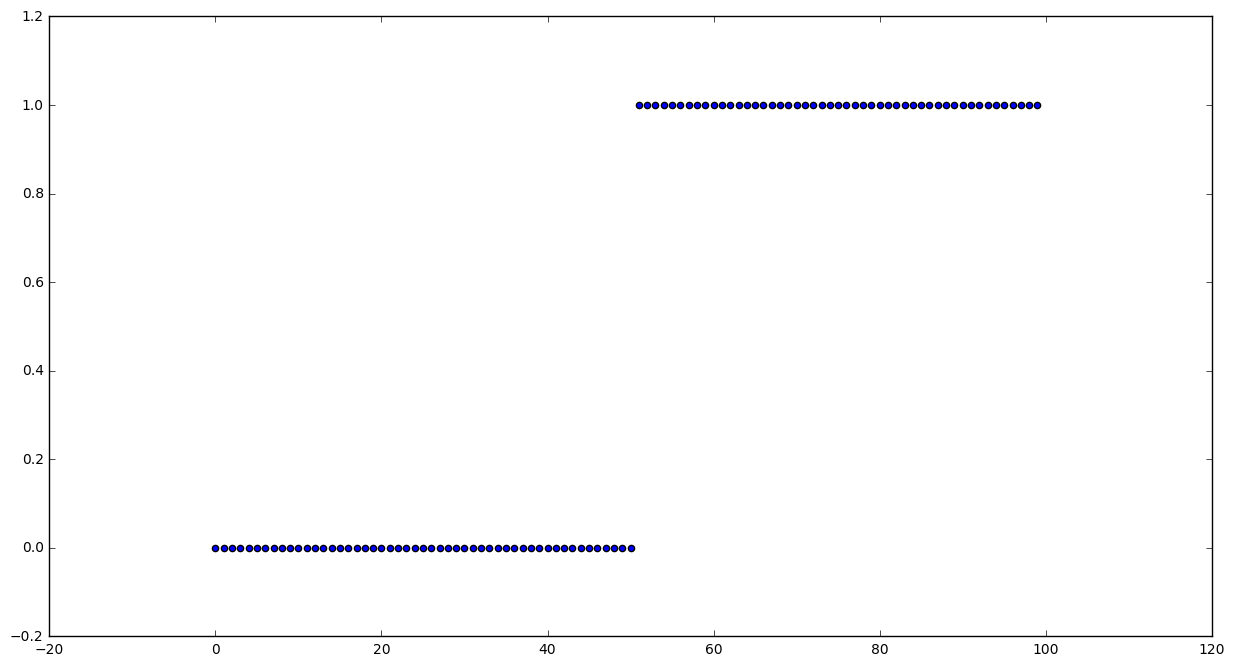

In [146]:
y_train = [1 if i > 0.5 else 0 for i in y_train]
plt.figure(figsize=(15,8))
plt.scatter(x_train,y_train)
plt.show()

In [147]:
theta = np.array([0,0])

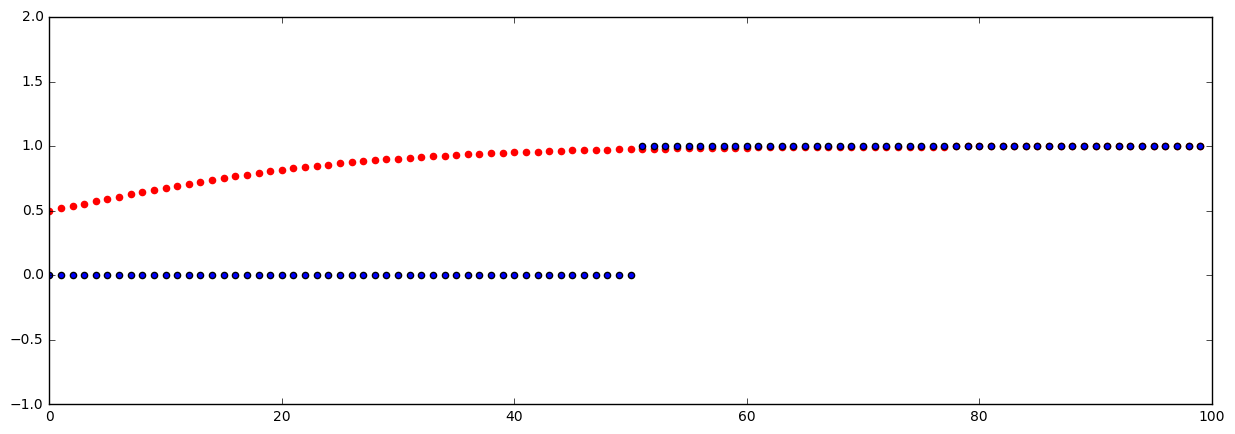

Cost:  0.000618910542621


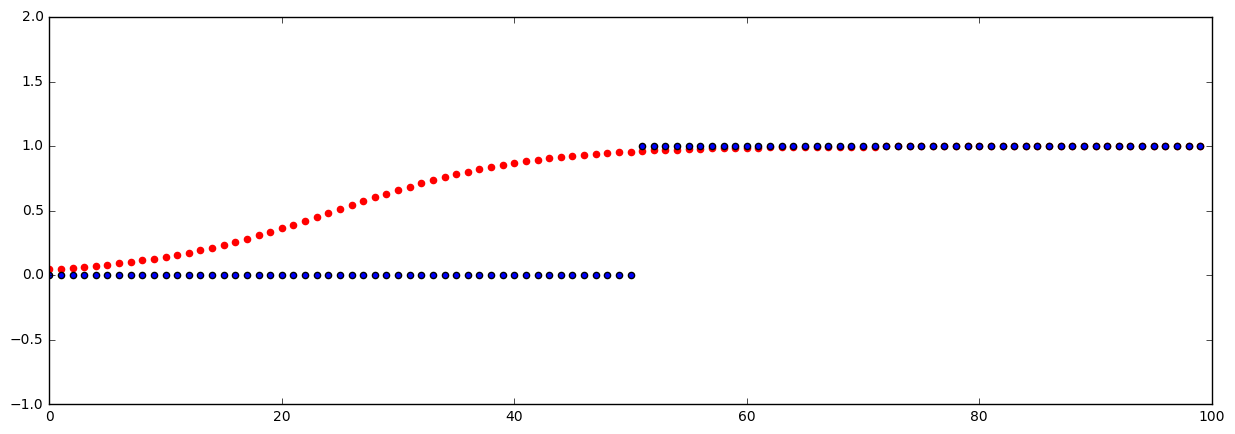

Cost:  0.000108691542782


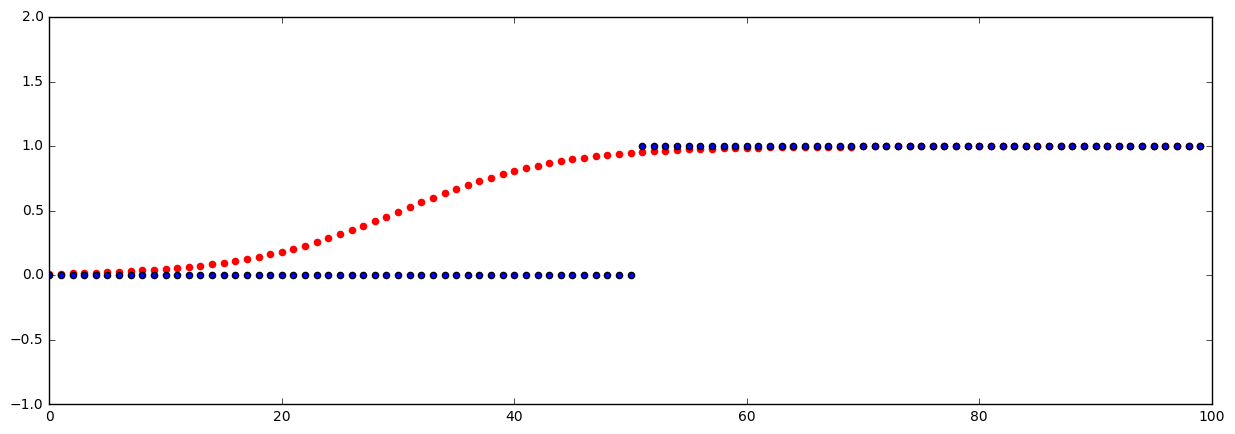

Cost:  4.26872643523e-05


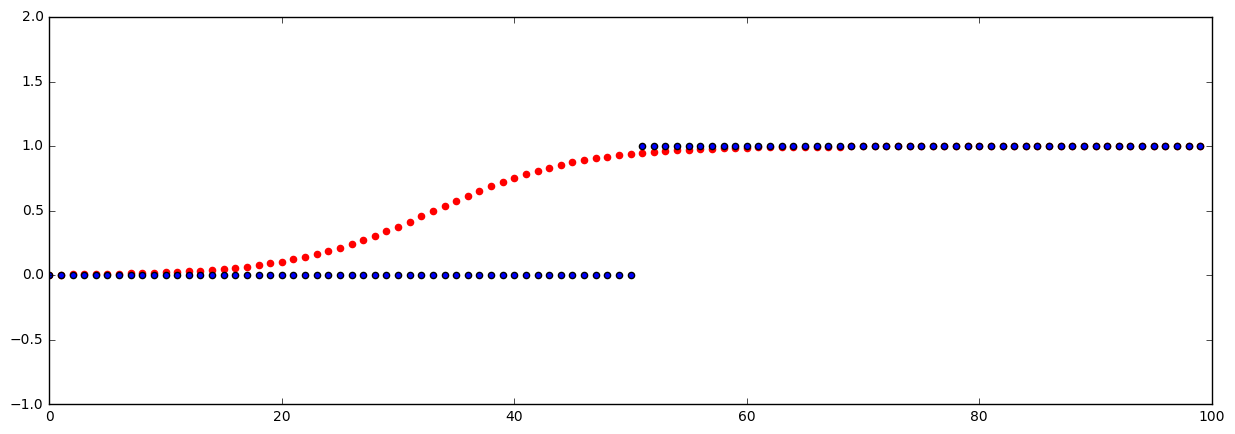

Cost:  2.16815659393e-05


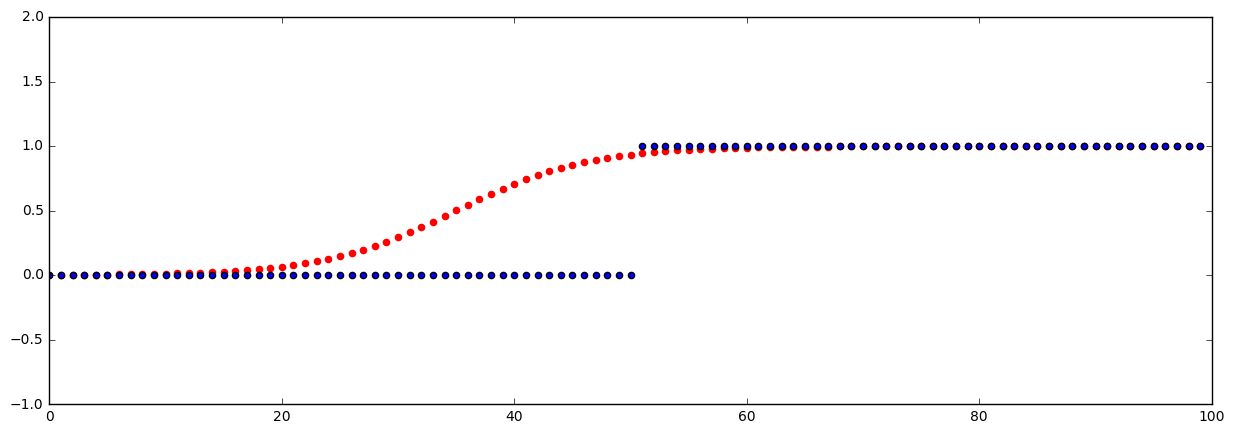

Cost:  1.25243101557e-05


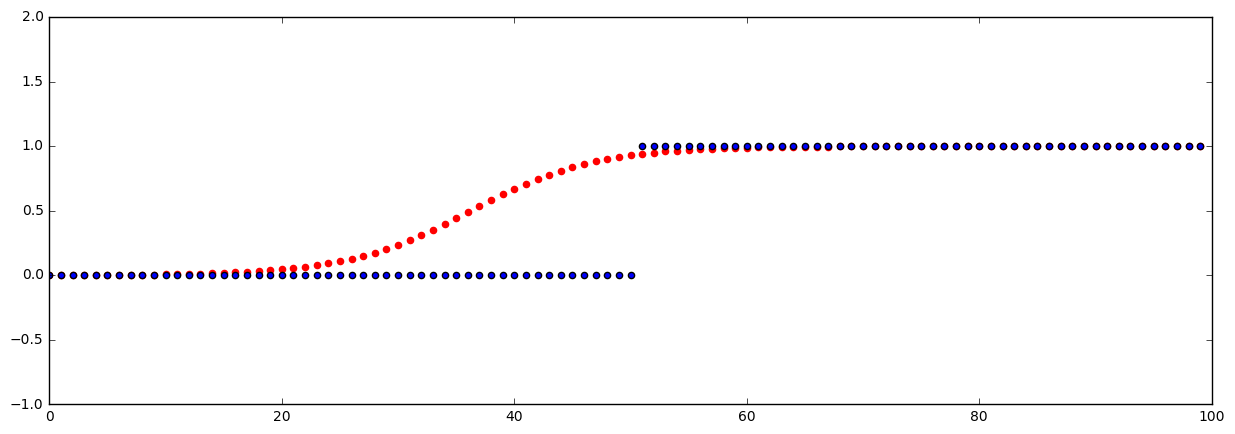

Cost:  7.82980345206e-06


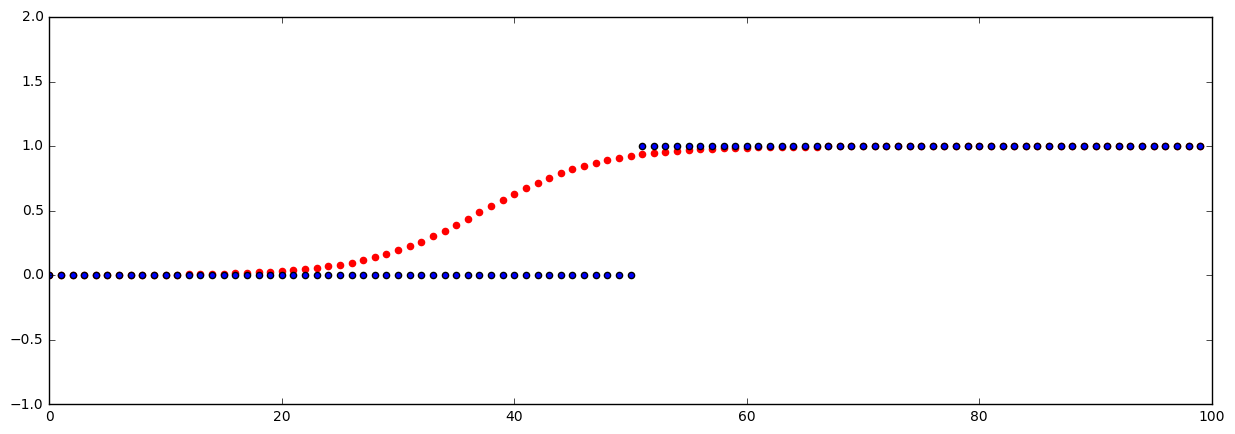

Cost:  5.16846497451e-06


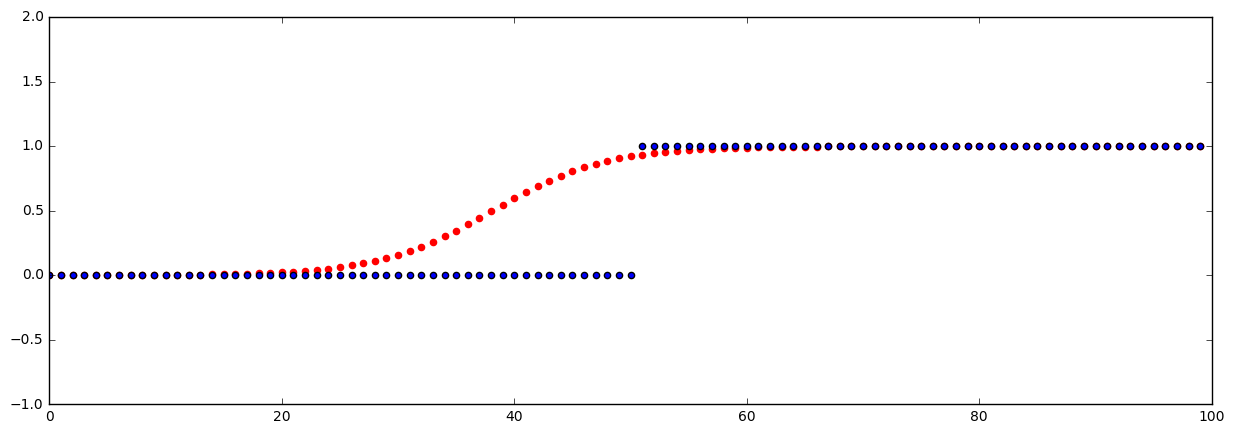

Cost:  3.55144318828e-06


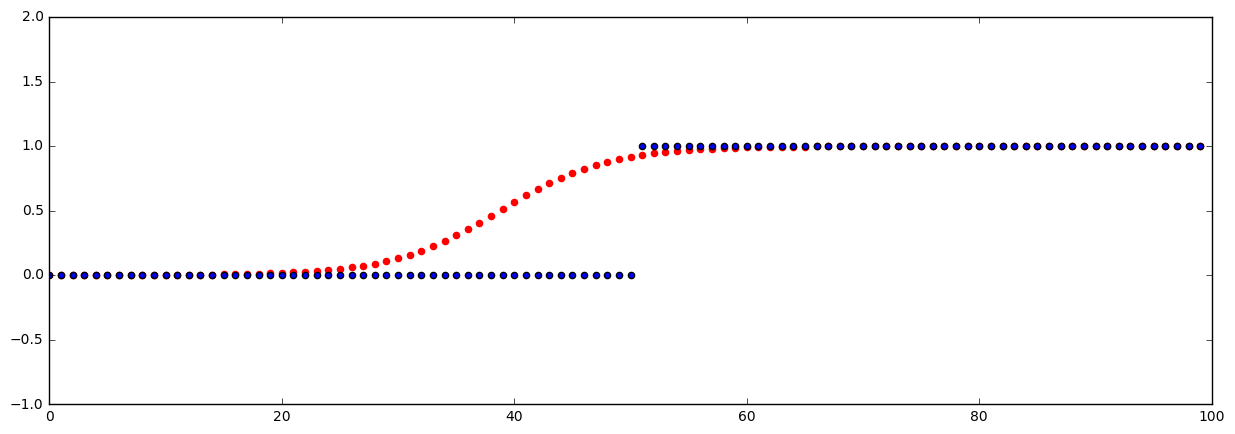

Cost:  2.51743468387e-06


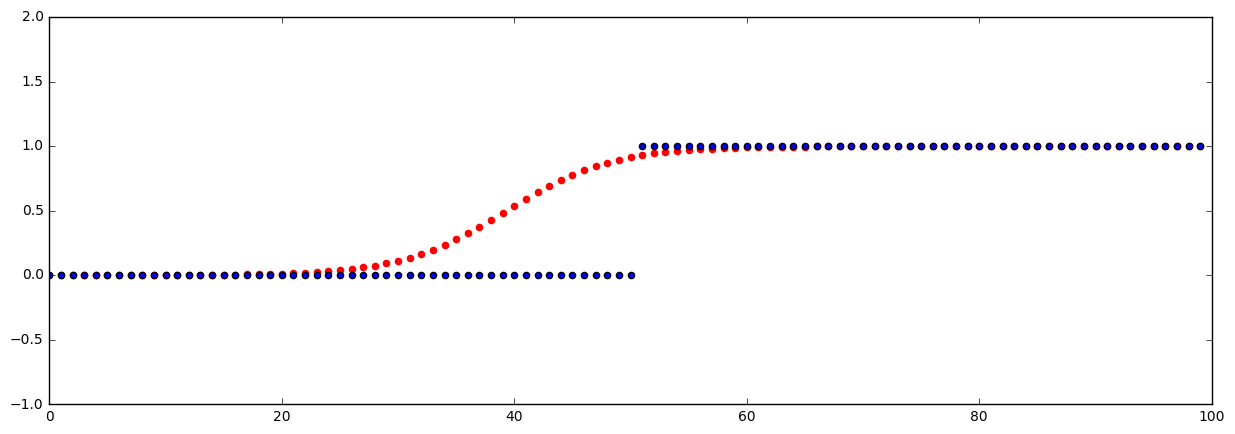

Cost:  1.82960917313e-06


In [148]:
#SGD
eta = 0.001
costs = []
for i in range(5000):
    for index,j in enumerate(x_train):
        ycap = 1.0/(1+np.exp(-np.dot(theta,[1,j])))
        cost = -(y_train[index]*np.log(ycap) + (1-y_train[index])*np.log(1-ycap))
        costs.append(cost)
        theta = theta - eta * (-y_train[index] * (1-ycap) + ycap * (1 - y_train[index])) * np.array([1,j])
    if i%500 == 0:
        plt.figure(figsize=(15,5))
        plt.subplot2grid((1, 1), (0, 0))
        plt.axis([0,100,-1,2])
        plt.scatter(x_train, map(lambda x: 1.0/(1+np.exp(-np.dot(theta,[1,x]))),x_train), color='red')
        #plt.plot(x_train, map(lambda x: np.dot(theta, np.array([1,x])),x_train))
        plt.scatter(x_train,y_train)
        plt.show()
        print "Cost: ",cost

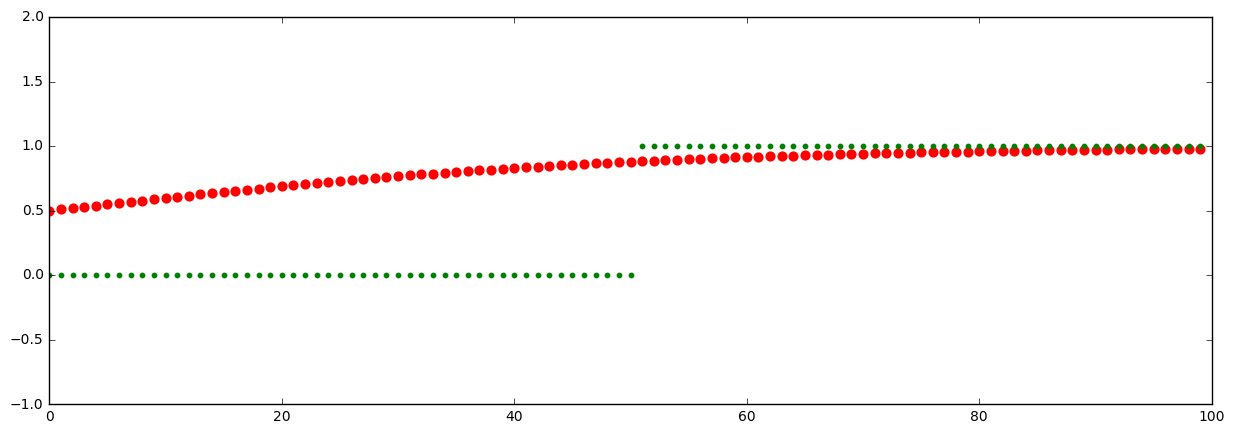

Cost:  0.0391852603785


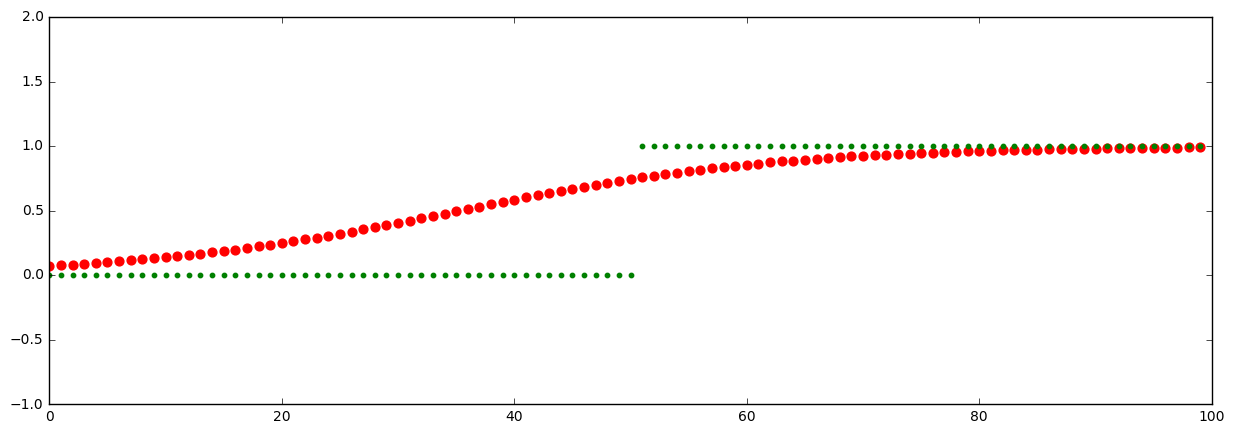

Cost:  0.0259223865814


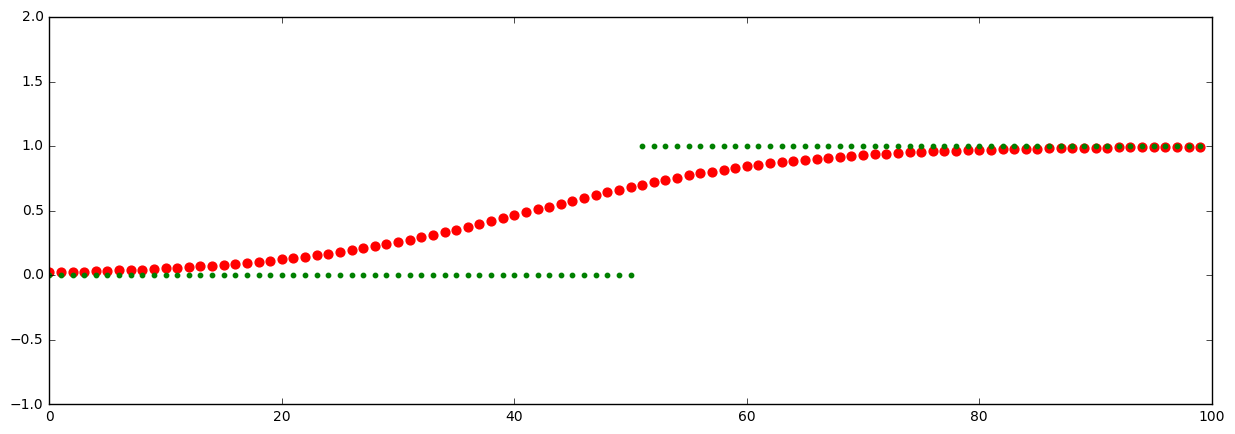

Cost:  0.0161406877381


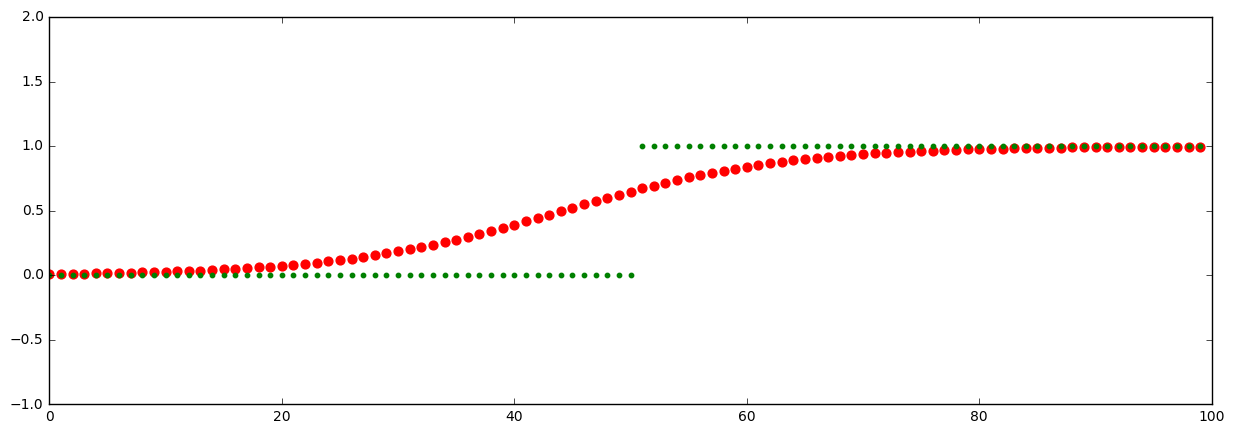

Cost:  0.0110782720091


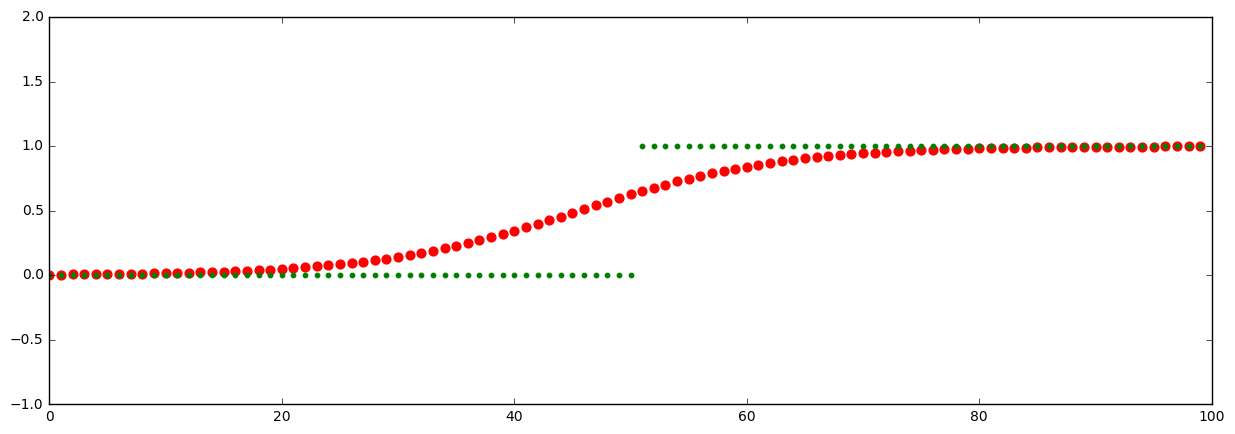

Cost:  0.00809369606119


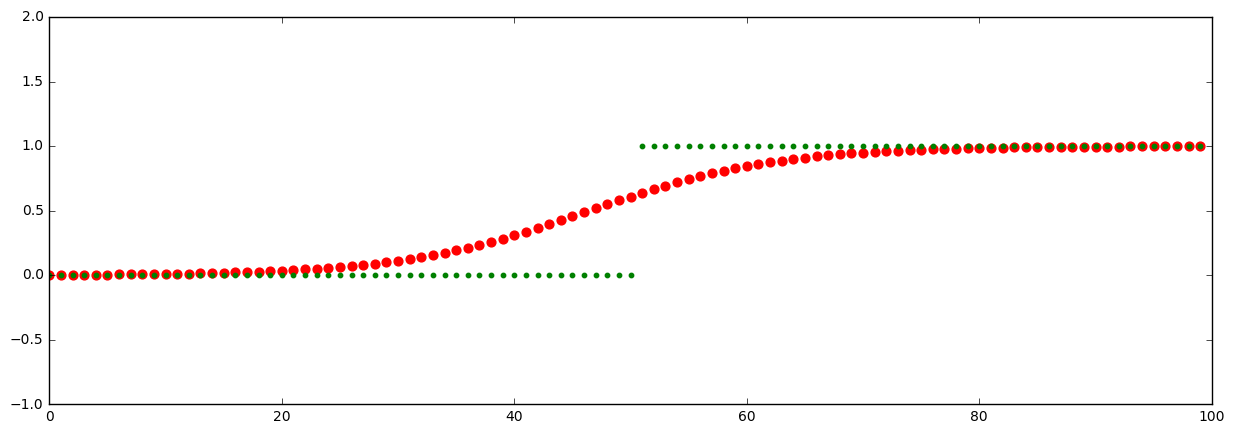

Cost:  0.00617010387054


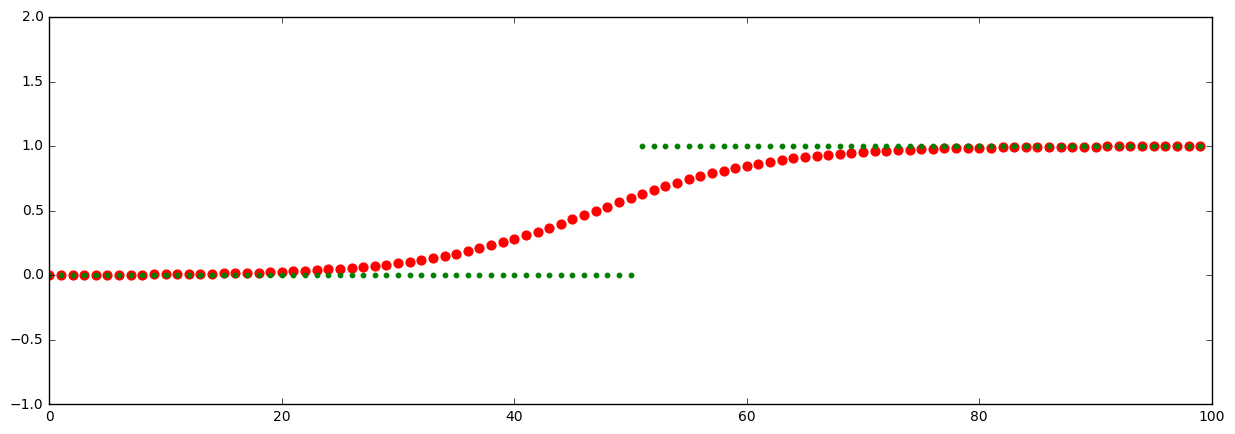

Cost:  0.00485095425312


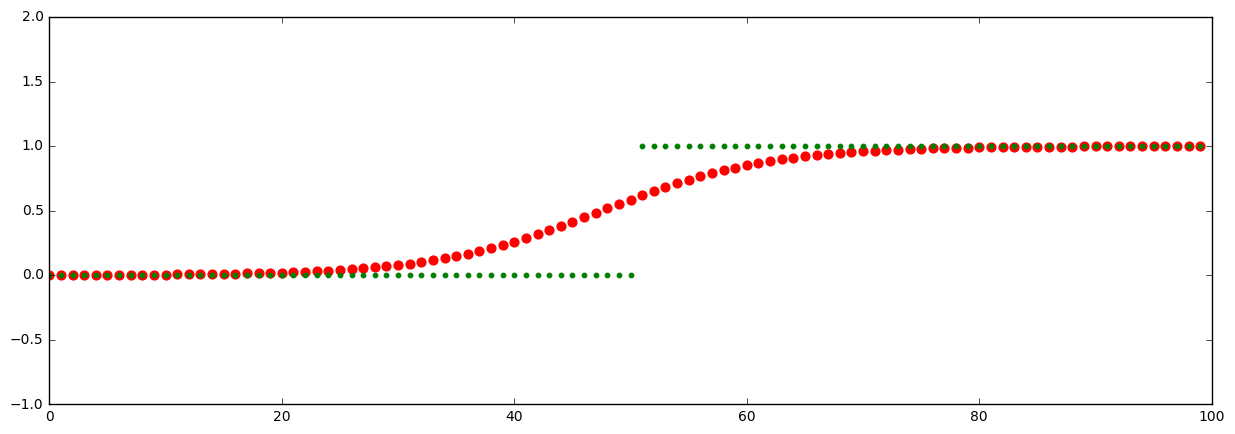

Cost:  0.00390433579286


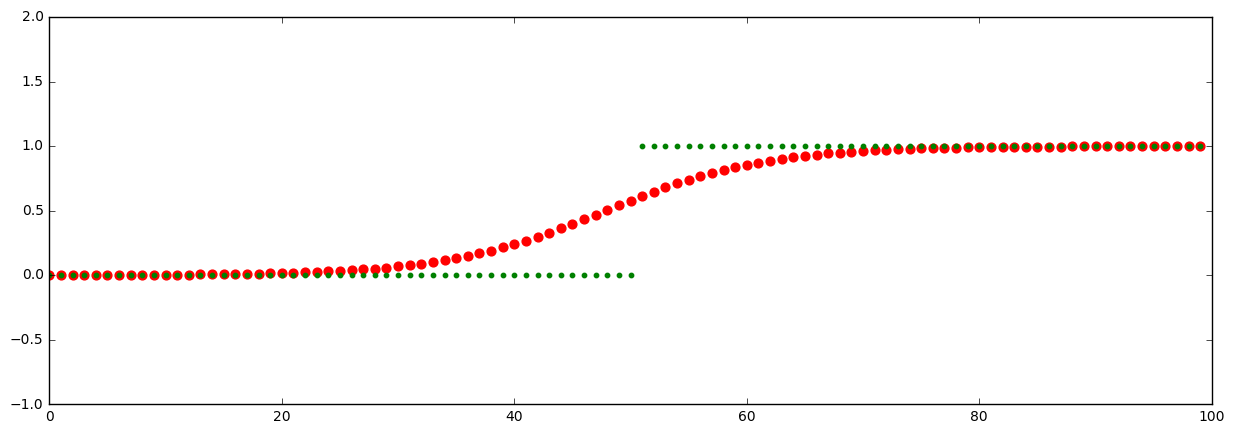

Cost:  0.0032011359781


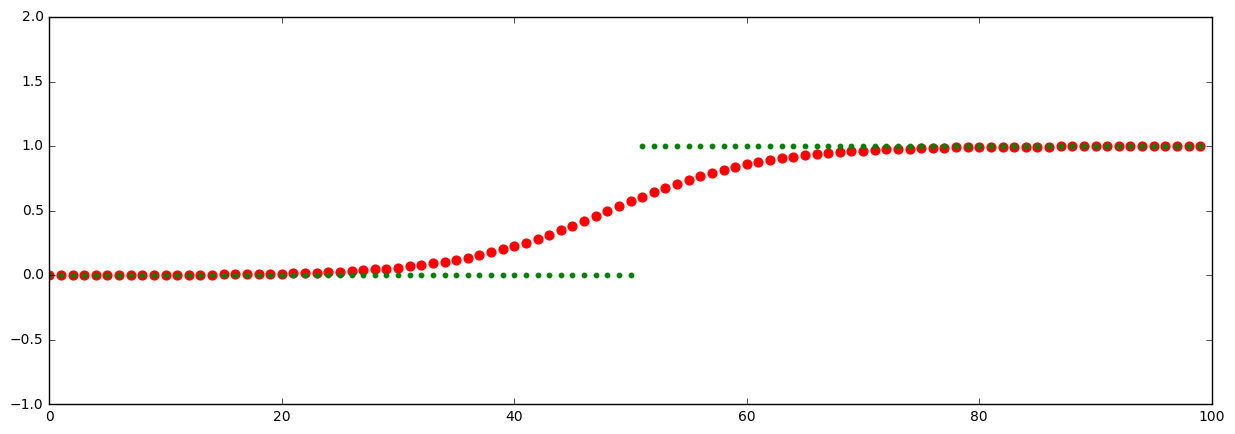

Cost:  0.00266431027462


In [154]:
theta = np.array([0,0])
#Mini-Batch
epoch = 40000
batch = 20
eta = 0.001
costs = []
for i in range(epoch):
    for j in range(0,len(x_train),batch):
        cost = 0
        cost_derivative = np.array([0,0])
        for index in range(j,j+batch):
            ycap = 1.0/(1+np.exp(-np.dot(theta,[1,x_train[index]])))
            cost += -(y_train[index]*np.log(ycap+0.00001) + (1-y_train[index])*np.log(1.00001-ycap))
            cost_derivative = cost_derivative + (ycap - y_train[index]) * np.array([1,x_train[index]])
        costs.append(cost/float(batch))
        theta = theta - (eta/float(batch)) * cost_derivative
    if i%4000 == 0:
        plt.figure(figsize=(15,5))
        plt.subplot2grid((1, 1), (0, 0))
        plt.axis([0,100,-1,2])
        plt.scatter(x_train, map(lambda x: 1.0/(1+np.exp(-np.dot(theta,[1,x]))),x_train), color='red',s=40)
        #plt.plot(x_train, map(lambda x: np.dot(theta, np.array([1,x])),x_train))
        plt.scatter(x_train,y_train, color='green',s=10)
        plt.show()
        print "Cost: ",cost/float(batch)

In [156]:
theta

array([-7.61778217,  0.15765337])

In [158]:
theta[0]/theta[1]

-48.319817379076888

In [151]:
from mpl_toolkits.mplot3d import Axes3D

X = np.arange(-100,100,2)
Y = np.arange(-100,100,2)
X, Y = np.meshgrid(X, Y)

Z = np.array([i for i in X])
Z.reshape(X.shape)

for iindex,i in enumerate(X):
    for jindex, j in enumerate(i):
        #val = calc_J(j,Y[iindex][jindex],x_train,y_train)
        val = 0
        for index, xx in enumerate(x_train):
            #print np.array([X[iindex][jindex],Y[iindex][jindex]])
            dota = -1*np.dot(np.array([X[iindex][jindex],Y[iindex][jindex]]),np.array([1,xx]))
            #print dota
            ycap = 1.0/(1+np.exp(dota))
            val += -(y_train[index]*np.log(ycap+0.000001) + (1-y_train[index])*np.log(1-ycap+0.000001))
        Z[iindex][jindex] = val

/home/ketan/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: overflow encountered in exp


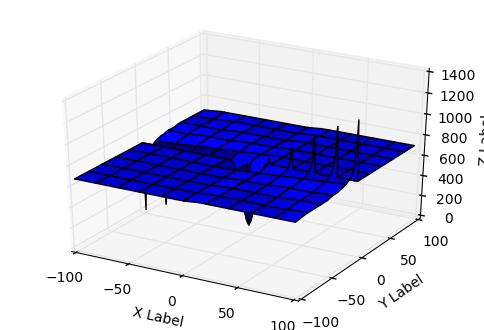

In [152]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z)
#print Z
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

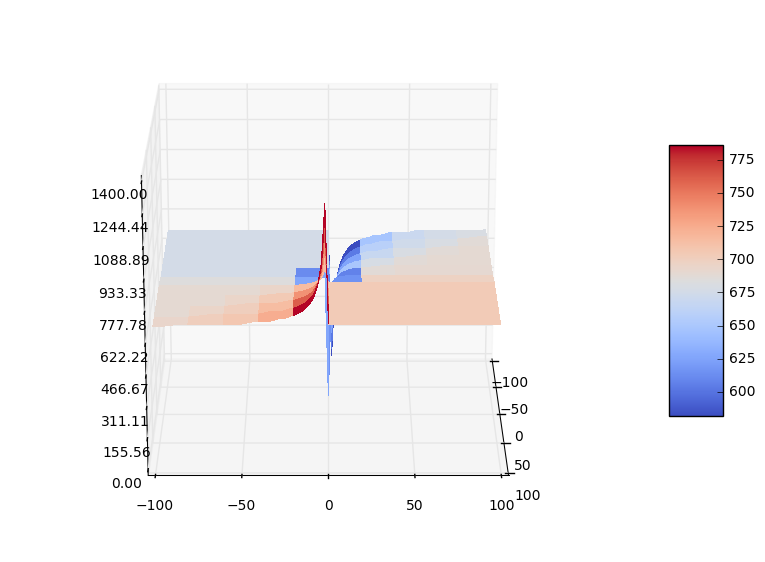

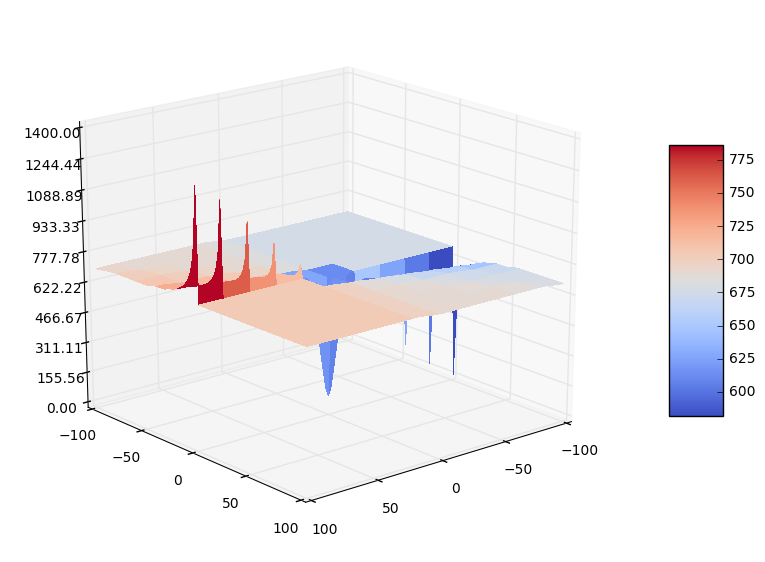

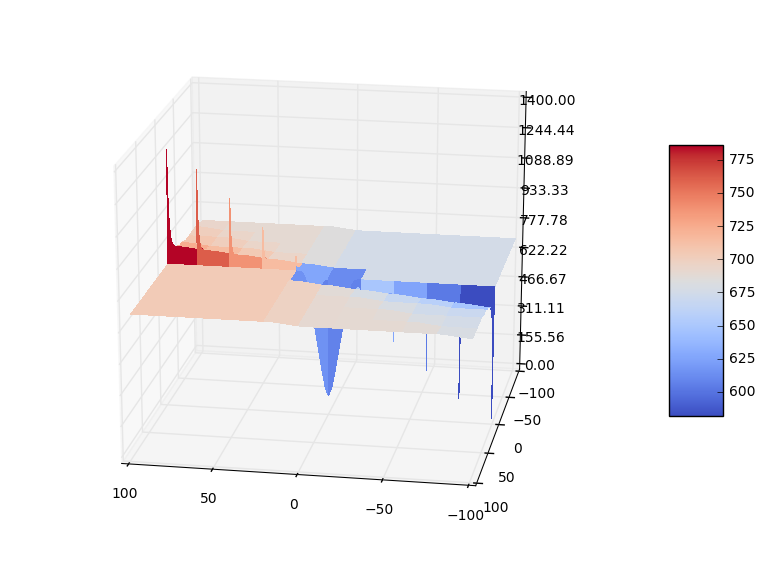

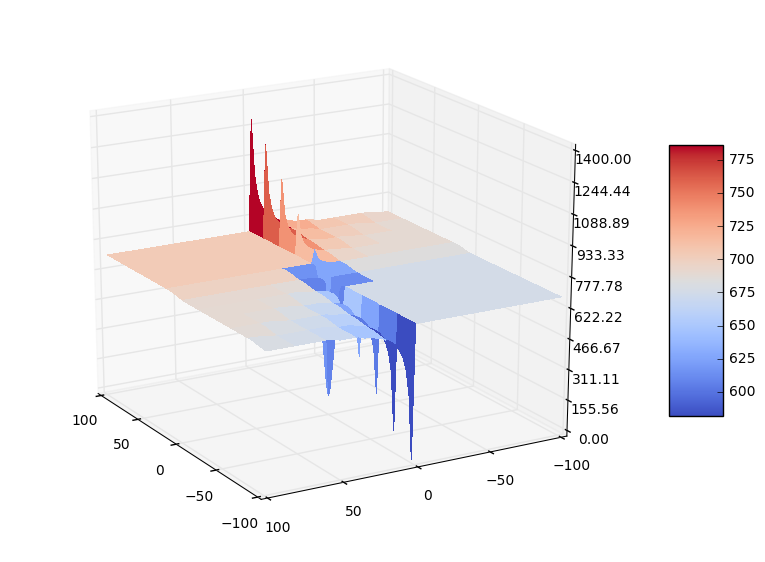

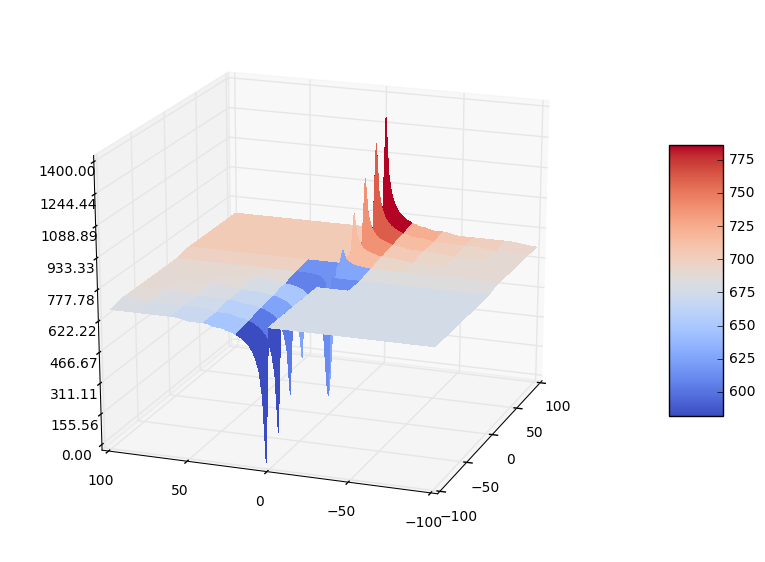

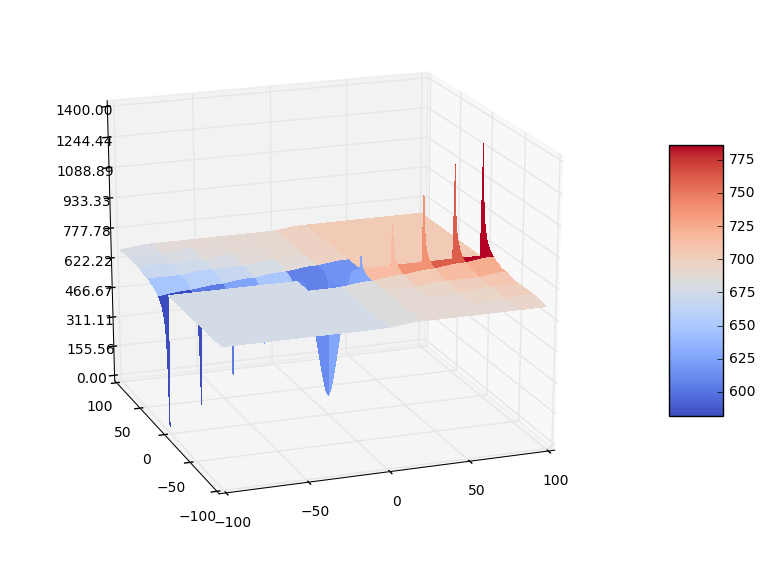

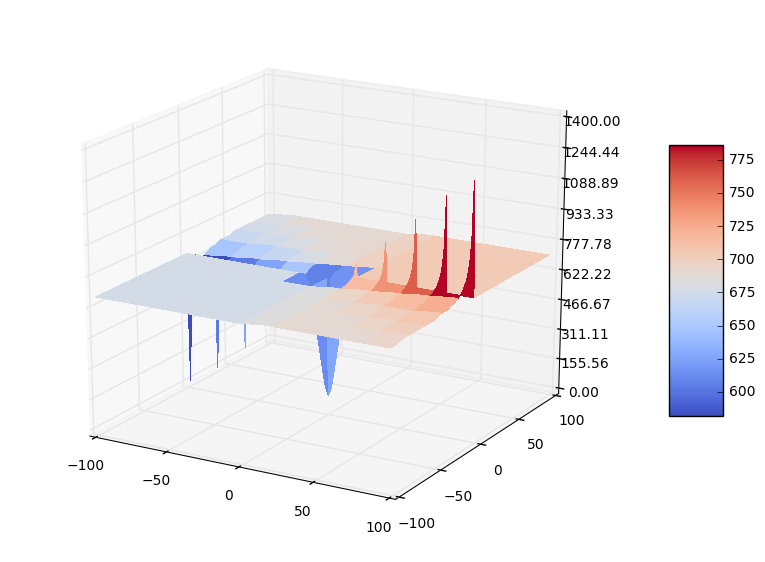

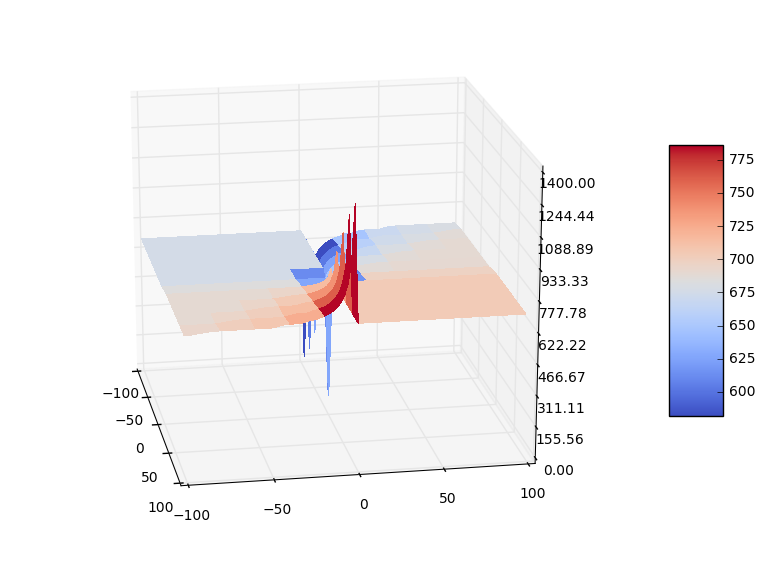

In [153]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter




for angle in range(0, 360, 50):
    fig = plt.figure(figsize=[10,7])
    ax = fig.gca(projection='3d')

# Plot the surface.
    surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    ax.view_init(20, angle)
    plt.draw()
    plt.pause(.1)
    plt.show()